## Data cleaning & modelling exercise

This is an example walking through the exploratory and cleanup steps that are recommended/typical of a real-world data science problem. (It's an example of the type of take-home challenge you might be given as part of a data science job interview process.)

The context: This company runs an app that helps people find doctors near them. After an introductory interview, they provide you with a dataset and ask you for some insights on what factors contribute to a user's likelihood to request an appointment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Patient-Acquisition-Data4.csv')
df.head()

,source,campaign,region,locality,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,facebook,san_diego_doctor_patient_acquisition,San Jose,San Jose,No Pref,Specific Treatment,f,9,0,0,10547.219510,f
1,facebook,san_diego_doctor_patient_acquisition,San Diego,Chula Vista,F,Checkup,f,2,0,0,20784.617720,f
2,try.healthcare.com,Unknown,Austin,Austin,No Pref,Checkup,t,9,8,1,8014.945931,t
3,facebook,denver_doctor_patient_acquisition,Denver,Golden,No Pref,Specific Treatment,t,8,2,6,16651.158750,f
4,facebook,chicago_doctor_patient_acquisition,Chicago,Chicago,F,Checkup,f,9,0,0,5216.934559,f


#### Check for duplicates

In [3]:
df.shape

(17503, 12)

In [4]:
df.duplicated().sum()

696

In [5]:
# Examine the duplicate rows
df.loc[df.duplicated(), :]

,source,campaign,region,locality,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
198,facebook,seattle_doctor_patient_acquisition,Seattle,Seattle,No Pref,Checkup,t,9,0,9,13044.163950,f
521,facebook,denver_doctor_patient_acquisition,Denver,Arvada,No Pref,Checkup,t,9,8,1,12212.261400,f
548,facebook,chicago_doctor_patient_acquisition,Chicago,Lombard,No Pref,Checkup,t,9,2,7,13556.880770,f
620,facebook,seattle_doctor_patient_acquisition,Seattle,Renton,F,Checkup,t,9,9,0,12340.556790,f
705,facebook,denver_doctor_patient_acquisition,Denver,Denver,No Pref,Checkup,t,9,3,6,20083.469970,f
...,...,...,...,...,...,...,...,...,...,...,...,...
11888,facebook,austin_doctor_patient_acquisition,Austin,Denton,No Pref,Checkup,t,0,0,0,NaN,f
11923,facebook,san_jose_doctor_patient_acquisition,San Jose,San Jose,F,Checkup,f,7,0,0,9305.008092,f
11927,facebook,san_diego_doctor_patient_acquisition,San Diego,San Diego,No Pref,Checkup,f,9,0,0,9545.908608,f
11930,facebook,san_jose_doctor_patient_acquisition,San Jose,San Jose,No Pref,Checkup,t,3,2,1,14258.213170,f


Roughly 4% of the data is duplicate. But since there's no unique identifiers, its certainly possible that 2 distinct users share similar information in the dataset. Because the amount of duplicate information is low, we'll keep the duplicates.

In [6]:
# Check for duplicate columns
df.T.duplicated()

source                       False
campaign                     False
region                       False
locality                     False
preferred_doctor_gender      False
reason_for_visit             False
patient_insured              False
number_of_match_results      False
out_network_results_shown    False
in_network_results_shown     False
avg_distance_overall         False
appointment_requested        False
dtype: bool

#### Check for Null values

In [7]:
df.isna().sum()

source                        26
campaign                      12
region                         0
locality                       0
preferred_doctor_gender        0
reason_for_visit              10
patient_insured                0
number_of_match_results        0
out_network_results_shown      0
in_network_results_shown       0
avg_distance_overall         570
appointment_requested          0
dtype: int64

We'll tidy up Null values as we explore each column.

#### Data exploration

facebook                         10754
adwords                           1702
Patients                           969
www.healthcare.com                 871
try.healthcare.com                 607
                                 ...  
r.search.aol.com:443                 1
results.searchlock.com               1
www.health247.com                    1
doctorfrisco-tx.com                  1
egglestonoms.clickforward.com        1
Name: source, Length: 73, dtype: int64


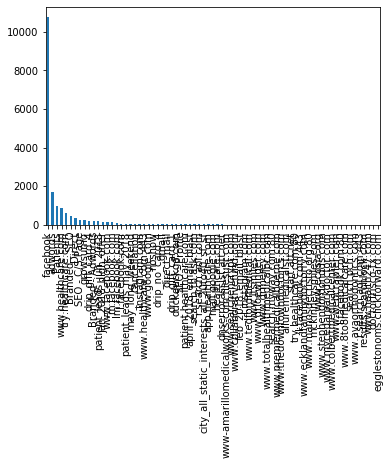

In [8]:
# Plot the frequency of each Source
df['source'].value_counts().plot(kind='bar')

# Print out the frequency counts
print(df['source'].value_counts())

For this initial analysis, I'll keep the most dominant sources, (Facebook & adwords), and bucket the rest to be 'Other' (including the Null values). Although in a future analysis, we could dive deeper into different source trends.

In [9]:
df.loc[~df['source'].isin(['facebook','adwords']), 'source'] = 'Other'

In [10]:
df['source'].value_counts()

facebook    10754
Other        5047
adwords      1702
Name: source, dtype: int64

Unknown                                          3682
austin_doctor_patient_acquisition                1982
seattle_doctor_patient_acquisition               1980
chicago_doctor_patient_acquisition               1965
san_francisco_doctor_patient_acquisition         1523
denver_doctor_patient_acquisition                1182
san_jose_doctor_patient_acquisition               857
san_diego_doctor_patient_acquisition              714
search_chicago_local                              456
doctor_patient_acquisition                        413
patient_leads_jun_2018                            398
search_seattle_metro                              299
search_austin_local                               245
search_sanfrancisco_metro                         206
branded_keywords                                  203
search_seattle_local                              184
search_sanfrancisco_local                         182
jan_2018_high_offer                               181
search_chicago_metro        

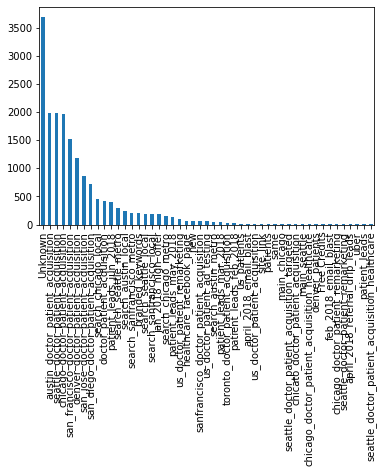

In [11]:
# Move onto campaign column
df['campaign'].value_counts().plot(kind='bar')

print(df['campaign'].value_counts())

We'll a similar bucketing here. First we'll set the Null values to be 'Unknown'. Then we'll group all the 'doctor_patient_acquisitions' together, as well as all the 'search' campaigns and 'patient_leads'. The rest will be grouped into an 'Other' category.

In [12]:
# fill nulls
df['campaign'].fillna('Unknown', inplace=True)

In [13]:
df.loc[df['campaign'].str.contains('doctor_patient_acquisition'), 
       'campaign'] = 'doctor_patient_acquisition'

b

df.loc[df['campaign'].str.contains('patient_leads'),
      'campaign'] = 'patient_leads'

# Bucket all the Other campaigns
df.loc[~df['campaign'].isin(['Unknown', 'doctor_patient_acquisition', 'search', 'patient_leads']), 'campaign'] = 'Other'

In [14]:
df['campaign'].value_counts()

doctor_patient_acquisition    10714
Unknown                        3694
search                         1781
Other                           716
patient_leads                   598
Name: campaign, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17503 entries, 0 to 17502
Data columns (total 12 columns):
source                       17503 non-null object
campaign                     17503 non-null object
region                       17503 non-null object
locality                     17503 non-null object
preferred_doctor_gender      17503 non-null object
reason_for_visit             17493 non-null object
patient_insured              17503 non-null object
number_of_match_results      17503 non-null int64
out_network_results_shown    17503 non-null int64
in_network_results_shown     17503 non-null int64
avg_distance_overall         16933 non-null float64
appointment_requested        17503 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 1.6+ MB


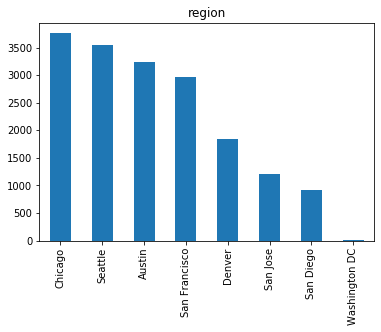

Chicago          3758
Seattle          3552
Austin           3249
San Francisco    2974
Denver           1844
San Jose         1203
San Diego         909
Washington DC      14
Name: region, dtype: int64


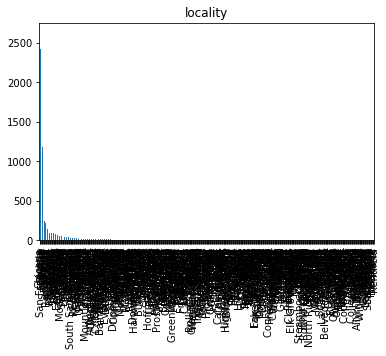

Chicago          2621
Austin           2419
San Francisco    2050
Seattle          1718
Denver           1186
                 ... 
Pasadena            1
Maxwell             1
Bee Cave            1
Hurst               1
Kentfield           1
Name: locality, Length: 512, dtype: int64


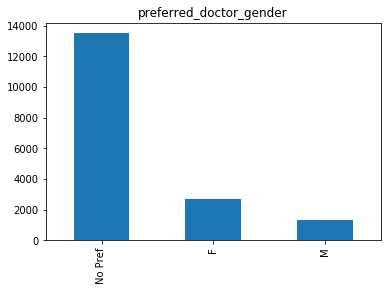

No Pref    13517
F           2664
M           1322
Name: preferred_doctor_gender, dtype: int64


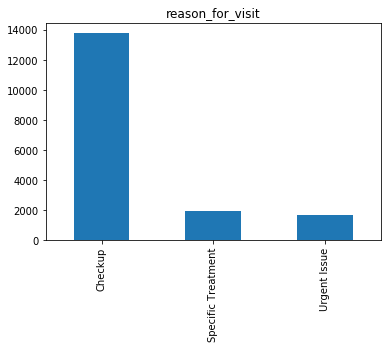

Checkup               13795
Specific Treatment     1980
Urgent Issue           1718
Name: reason_for_visit, dtype: int64


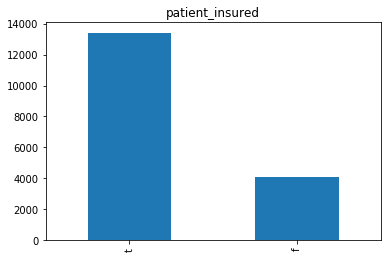

t    13411
f     4092
Name: patient_insured, dtype: int64


In [16]:
# Loop over remaining categorical columns to examine them

cat_columns = ['region', 'locality', 'preferred_doctor_gender',
              'reason_for_visit', 'patient_insured']

for column in cat_columns:
    
    # Plot the frequencies
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()
    
    # Print the frequencies
    print(df[column].value_counts())

From looking at the remaining categorical columns, there are 2 actions to be taken. Because of the sheer volume of categories in the Locality column, we will drop the column here, as we're already doing some regional analysis through the Region column. We also need to fill the Null values from the reason_for_visit column, and since Checkup is by far the most common reason for visit, it makes sense to fill the 10 missing values with the mode here.

In [17]:
# Drop the locality column
df.drop(['locality'], axis=1, inplace=True)

In [18]:
# Fill reason_for_visit NaNs with the mode
mode = df['reason_for_visit'].mode()[0]

df['reason_for_visit'].fillna(mode, inplace=True)

In [19]:
df.isna().sum()

source                         0
campaign                       0
region                         0
preferred_doctor_gender        0
reason_for_visit               0
patient_insured                0
number_of_match_results        0
out_network_results_shown      0
in_network_results_shown       0
avg_distance_overall         570
appointment_requested          0
dtype: int64

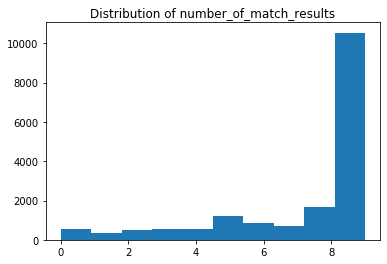

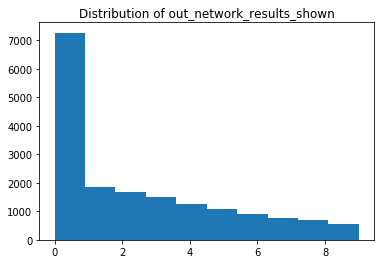

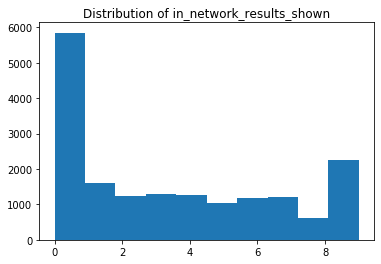

C:\Users\saleh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\saleh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


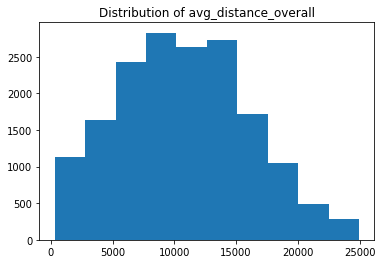

In [20]:
# Examine the distribution of the numerical columns

num_columns = ['number_of_match_results', 'out_network_results_shown',
              'in_network_results_shown', 'avg_distance_overall']

for column in num_columns:
    
    # Plot a histogram
    plt.figure()
    plt.hist(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [21]:
print(df['avg_distance_overall'].median())
print(df['avg_distance_overall'].mean())

10575.22173
10777.897338739042


We'll replace the Null values in the 'avg_distance_overall' column with the respective mean distance from the user's region.

In [22]:
regional_means = df.groupby(['region'])['avg_distance_overall'].mean()
print(regional_means)

region
Austin           13435.711897
Chicago           9572.853415
Denver           11342.075331
San Diego        13317.093406
San Francisco     7764.943327
San Jose         11535.861785
Seattle          11122.262686
Washington DC     2851.145865
Name: avg_distance_overall, dtype: float64


In [23]:
# Temporarily index my dataframe by Region
df = df.set_index(['region'])

In [24]:
# Fill Null values by matching on region
df['avg_distance_overall'].fillna(regional_means, inplace = True)

In [25]:
# Reset index back to original numeric
df = df.reset_index()

In [26]:
df.head()

,region,source,campaign,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,San Jose,facebook,doctor_patient_acquisition,No Pref,Specific Treatment,f,9,0,0,10547.219510,f
1,San Diego,facebook,doctor_patient_acquisition,F,Checkup,f,2,0,0,20784.617720,f
2,Austin,Other,Unknown,No Pref,Checkup,t,9,8,1,8014.945931,t
3,Denver,facebook,doctor_patient_acquisition,No Pref,Specific Treatment,t,8,2,6,16651.158750,f
4,Chicago,facebook,doctor_patient_acquisition,F,Checkup,f,9,0,0,5216.934559,f


In [27]:
df.isna().sum()

region                       0
source                       0
campaign                     0
preferred_doctor_gender      0
reason_for_visit             0
patient_insured              0
number_of_match_results      0
out_network_results_shown    0
in_network_results_shown     0
avg_distance_overall         0
appointment_requested        0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17503 entries, 0 to 17502
Data columns (total 11 columns):
region                       17503 non-null object
source                       17503 non-null object
campaign                     17503 non-null object
preferred_doctor_gender      17503 non-null object
reason_for_visit             17503 non-null object
patient_insured              17503 non-null object
number_of_match_results      17503 non-null int64
out_network_results_shown    17503 non-null int64
in_network_results_shown     17503 non-null int64
avg_distance_overall         17503 non-null float64
appointment_requested        17503 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 1.5+ MB


#### Convert f/t columns to be 0/1

In [29]:
df['appointment_requested'].replace(to_replace={'f': 0, 't':1}, inplace=True)

In [30]:
df['patient_insured'].replace(to_replace={'f': 0, 't':1}, inplace=True)

In [31]:
df.head()

,region,source,campaign,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,San Jose,facebook,doctor_patient_acquisition,No Pref,Specific Treatment,0,9,0,0,10547.219510,0
1,San Diego,facebook,doctor_patient_acquisition,F,Checkup,0,2,0,0,20784.617720,0
2,Austin,Other,Unknown,No Pref,Checkup,1,9,8,1,8014.945931,1
3,Denver,facebook,doctor_patient_acquisition,No Pref,Specific Treatment,1,8,2,6,16651.158750,0
4,Chicago,facebook,doctor_patient_acquisition,F,Checkup,0,9,0,0,5216.934559,0


## Modelling

With the data clean, we can now model the column of interest, 'appointment_requested'. For this initial investigation I'll use a logistic regression model, partially because of its quickness and partially because it gives very good visibility into the relevance of specific features for predicting the outcome.

In [32]:
# Define X & y
X = df.iloc[:, :-1] # every column except the last one
y = df['appointment_requested']

In [33]:
# Turn our categorical columns into numerical columns with one-hot encoding
# (i.e. create dummy variables)

X = pd.get_dummies(X)

In [34]:
# Import the statsmodels package to run the logistic regression
import statsmodels.api as sm

# Add constant term
X = sm.add_constant(X)

# Instantiate & fit the model
my_logreg = sm.Logit(y, X).fit()

# Evaluate at the results
my_logreg.summary()

C:\Users\saleh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\saleh\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\saleh\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


         Current function value: 0.659924
         Iterations: 35


C:\Users\saleh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\saleh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\saleh\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     appointment_requested   No. Observations:                17503
Model:                             Logit   Df Residuals:                    17480
Method:                              MLE   Df Model:                           22
Date:                   Fri, 15 Nov 2019   Pseudo R-squ.:                 0.04652
Time:                           15:32:00   Log-Likelihood:                -11551.
converged:                         False   LL-Null:                       -12114.
Covariance Type:               nonrobust   LLR p-value:                1.650e-224
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4742        nan        nan        nan         nan         nan
patient_insured                         0.3691      0.121      3.045      0.002       0.132       0.607
number_of_match_results                 0.1257      0.014      9.019      0.000       0.098       0.153
out_network_results_shown              -0.0298      0.016     -1.854      0.064      -0.061       0.002
in_network_results_shown                0.0322      0.015      2.079      0.038       0.002       0.063
avg_distance_overall                -2.351e-05    3.5e-06     -6.709      0.000   -3.04e-05   -1.66e-05
region_Austin                           2.2196        nan        nan        nan         nan         nan
region_Chicago                          2.1464        nan        nan        nan         nan         nan
region_Denver                           2.4058        nan        nan        nan         nan         nan
region_San Diego                        2.3585        nan        nan        nan         nan         nan
region_San Francisco                    2.1589        nan        nan        nan         nan         nan
region_San Jose                         2.0473        nan        nan        nan         nan         nan
region_Seattle                          2.2295        nan        nan        nan         nan         nan
region_Washington DC                  -17.0401        nan        nan        nan         nan         nan
source_Other                           -0.5544   2.17e+06  -2.55e-07      1.000   -4.26e+06    4.26e+06
source_adwords                         -0.4757   2.48e+06  -1.92e-07      1.000   -4.87e+06    4.87e+06
source_facebook                        -0.4440   2.28e+06  -1.95e-07      1.000   -4.46e+06    4.46e+06
campaign_Other                         -0.2872   2.91e+06  -9.86e-08      1.000   -5.71e+06    5.71e+06
campaign_Unknown                       -0.1559   2.92e+06  -5.34e-08      1.000   -5.72e+06    5.72e+06
campaign_doctor_patient_acquisition    -0.4152   2.92e+06  -1.42e-07      1.000   -5.73e+06    5.73e+06
campaign_patient_leads                  0.3255    2.9e+06   1.12e-07      1.000   -5.68e+06    5.68e+06
campaign_search                        -0.9414   2.94e+06  -3.21e-07      1.000   -5.75e+06    5.75e+06
preferred_doctor_gender_F              -0.4448   1.09e+06  -4.06e-07      1.000   -2.15e+06    2.15e+06
preferred_doctor_gender_M              -0.4937   1.09e+06  -4.51e-07      1.000   -2.15e+06    2.15e+06
preferred_doctor_gender_No Pref        -0.5357   1.09e+06  -4.89e-07      1.000   -2.15e+06    2.15e+06
reason_for_visit_Checkup               -0.4318        nan        nan        nan         nan         nan
reason_for_visit_Specific Treatment    -0.6565        nan        nan        nan         nan         nan
reason_for_visit_Urgent Issue          -0.3859        nan        nan        nan         nan   

#### Summary

Hmmm... looks like our data isn't as clean as we thought. Although the numerical seem to be giving us sensible answers.

We can see that a patient being insured leads to a higher likelihood to request an appointment, so I would recommend that the marketing team target insured people.

We also see that users are more likely to request an appointment when there are more search results and those search results are closer to them. Based on this I would recommend that the marketing team try to increase the number of doctors on the app in highly populated areas.

With a p-value above 0.05, we can't conclude that the number of out-of-network-results-shown has a significant impact on likelihood to request an appointment.
- - - 

Stay tuned next time to see how we can remove multicolinearity from our categorical columns and get more sensible results overall.

In [37]:
df.head()

,region,source,campaign,preferred_doctor_gender,reason_for_visit,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested
0,San Jose,facebook,doctor_patient_acquisition,No Pref,Specific Treatment,0,9,0,0,10547.219510,0
1,San Diego,facebook,doctor_patient_acquisition,F,Checkup,0,2,0,0,20784.617720,0
2,Austin,Other,Unknown,No Pref,Checkup,1,9,8,1,8014.945931,1
3,Denver,facebook,doctor_patient_acquisition,No Pref,Specific Treatment,1,8,2,6,16651.158750,0
4,Chicago,facebook,doctor_patient_acquisition,F,Checkup,0,9,0,0,5216.934559,0


In [41]:
X = df.drop(['reason_for_visit'], axis=1)

In [47]:
X = pd.get_dummies(X)

In [48]:
X

,patient_insured,number_of_match_results,out_network_results_shown,in_network_results_shown,avg_distance_overall,appointment_requested,region_Austin,region_Chicago,region_Denver,region_San Diego,...,source_adwords,source_facebook,campaign_Other,campaign_Unknown,campaign_doctor_patient_acquisition,campaign_patient_leads,campaign_search,preferred_doctor_gender_F,preferred_doctor_gender_M,preferred_doctor_gender_No Pref
0,0,9,0,0,10547.219510,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,2,0,0,20784.617720,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,1,9,8,1,8014.945931,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,8,2,6,16651.158750,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,9,0,0,5216.934559,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17498,0,9,0,0,7353.117395,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
17499,1,6,1,5,6533.222726,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
17500,0,8,0,0,2772.480509,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
17501,0,9,0,0,11429.802840,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [43]:
y = df['reason_for_visit']

In [44]:
y

0        Specific Treatment
1                   Checkup
2                   Checkup
3        Specific Treatment
4                   Checkup
                ...        
17498               Checkup
17499               Checkup
17500               Checkup
17501               Checkup
17502          Urgent Issue
Name: reason_for_visit, Length: 17503, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

# Split the data into train &  test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [58]:
# Create a pipeline
doc_est = [('Normalise', StandardScaler()),
            ('Reduce', PCA()),
            ('Model', LogisticRegression())]

doc_pipe = Pipeline(doc_est)

In [71]:
# Set the GridSearch Parameters, or the parameters that can be changed in each model for it to run through them all
# It is in a dictionary format, you label each step, and set what you want changed in each step, with a DOUBLE __ before a
# parameter.

# EG: (Step Name)__(Parameter): [LIST OF VALUES TO TRY]

param_grid = [{
    'Normalise': [StandardScaler(), None],
    'Reduce': [None],
    'Model': [LogisticRegression()],
    'Model__C': [0.001, 0.01, 0.1, 1, 100],
    'Model__penalty': ['l1', 'l2']
},
    
{
    'Normalise': [StandardScaler(), None],
    'Reduce': [PCA()],
    'Reduce__n_components': [1,2,3],
    'Model': [LogisticRegression()],
    'Model__C': [0.01, 0.01, 0.1, 1, 100],
    'Model__penalty': ['l1', 'l2']
},
    
{
    'Normalise': [None],
    'Reduce': [None],
    'Model': [RandomForestClassifier()],
    'Model__n_estimators': [5, 10, 15, 20, 25, 30, 50],
    'Model__max_depth': [1, 5, 10, 15, 20]
},

{
    'Model': [svm.SVC()],
    'Normalise': [StandardScaler(), None],
    'Model__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'Model__C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(doc_pipe, param_grid=param_grid)

In [73]:
# Set what the GridSearch will use in its model, so we set it to use the train set as it tunes parameters.
grid_search = grid_search.fit(X_train, y_train)

In [74]:
# See the score
print(f'Test Accuracy {grid_search.score(X_test, y_test)}')
print(f'Training Accuracy: {grid_search.score(X_train, y_train)}')

Test Accuracy 0.8267637817766352
Training Accuracy: 0.9289591467479288


In [75]:
# What was the best model?
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('Normalise',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Reduce',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('Model',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=100,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)